In [51]:
!pip install seaborn

    100% |████████████████████████████████| 184kB 250kB/s ta 0:00:01
  Running setup.py install for seaborn ... done
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sys
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Classifiers libraries
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_auc_score, confusion_matrix, accuracy_score

In [86]:
data_set = pd.read_csv('./resultadosfinais2017.csv', sep=';')
len(data_set.columns)

16

In [7]:
for c in data_set.columns:
    print (c, len(data_set[c].unique()))

ano 1
nescolnome 335
ebairrnome 77
eescolruae 290
aescolnume 195
cescolrpae 6
modens 6
compens 10
anoensino 23
esermodesc 24
nmodennome 6
turma 12
nturesnome 4
mat 95978
situ 9
esitaldesc 9


In [54]:
data_set.columns
data_set2 = data_set.drop(['ano', 'situ'], axis=1)
data_set2

,nescolnome,ebairrnome,eescolruae,aescolnume,cescolrpae,modens,compens,anoensino,esermodesc,nmodennome,turma,nturesnome,mat,esitaldesc
0,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,12998192,RENV S/SIT FINAL DEF
1,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,16065662,TR DUR ANO FORA REDE
2,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15685799,RENV S/SIT FINAL DEF
3,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15655024,RENV S/SIT FINAL DEF
4,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641112,RENV S/SIT FINAL DEF
5,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641597,RENV S/SIT FINAL DEF
6,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,14321661,RENV S/SIT FINAL DEF
7,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17769523,RENV S/SIT FINAL DEF
8,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17612209,RENV S/SIT FINAL DEF
9,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,17612810,RENV S/SIT FINAL DEF


In [9]:
for c in data_set2.columns:
    print (c, len(data_set2[c].unique()))

nescolnome 335
ebairrnome 77
cescolrpae 6
modens 6
compens 10
anoensino 23
esermodesc 24
nmodennome 6
turma 12
nturesnome 4
mat 95978
situ 9


In [55]:
data_set2.to_csv('./data_set_escola.csv', index=False)

RPA 01 – CENTRO
Boa Vista, Cabanga, Ilha do Leite, Ilha Joana Bezerra, Paissandu, Recife, Santo Amaro, Santo Antonio, Sao Jose, Soledade.

RPA 02 – NORTE
agua Fria, Alto Santa Terezinha, Arruda, Beberibe, Bomba do Hemeterio, Cajueiro, Campina do Barreto, Campo Grande, Dois Unidos, Encruzilhada, Fundao, Hipodromo, Linha do Tiro, Ponto de Parada, Porto da Madeira, Rosarinho, Torreao.

RPA O3 – NORDESTE
Aflitos, Alto do Mandu, Alto do Bonifacio, Alto Jose do Pinho, Apipucos, Brejo da Guabiraba, Brejo do Beberibe, Casa Amarela, Casa Forte, Corrego do Jenipapo, Derby, Dois Irmaos, Espinheiro, Gracas, Guabiraba, Jaqueira, Macaxeira, Mangabeira, Monteiro, Morro da Conceicao, Nova Descoberta, Parnamirim, Passarinho, Pau Ferro, Poco, Santana, Sitio dos Pintos, Tamarineira, Vasco da Gama.

RPA 04 – OESTE
Caxanga, Cidade Universitaria, Cordeiro, Engenho do Meio, Ilha do Retiro, Iputinga, Madalena, Prado, Torre, Torroes, Varzea, Zumbi.

RPA 05 – SUDOESTE
Afogados, Areias, Barro, Bongi, Cacote, Coqueiral, Curado, Estancia, Jardim Sao Paulo, Jiquia, Mangueira, Mustardinha, San Martin, Sancho, Tejipio, Toto.

RPA 06 – SUL
Boa Viagem, Brasilia Teimosa, Ibura, COHAB, Imbiribeira, IPSEP, Jordao, Pina.

In [56]:
data_set = pd.read_csv('./data_set_escola.csv')
data_set.head()

,nescolnome,ebairrnome,eescolruae,aescolnume,cescolrpae,modens,compens,anoensino,esermodesc,nmodennome,turma,nturesnome,mat,esitaldesc
0,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,12998192,RENV S/SIT FINAL DEF
1,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,16065662,TR DUR ANO FORA REDE
2,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15685799,RENV S/SIT FINAL DEF
3,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15655024,RENV S/SIT FINAL DEF
4,ABILIO GOMES,BOA VIAGEM,BRUNO VELOZO,S/N,6,0,5,GRUPO V,GRUPO V,EDUCACAO INFANTIL,A,MANHÃ,15641112,RENV S/SIT FINAL DEF


In [57]:
# data_set.ebairrnome.unique()
centro = ['Boa Vista', 'Cabanga', 'Ilha do Leite', 'Ilha Joana Bezerra', 'Paissandu', 'Recife', 'Santo Amaro', 'Santo Antonio', 'Sao Jose', 'Soledade', 'coelhos']
norte = ['peixinhos', 'agua Fria', 'Alto Santa Terezinha', 'Arruda', 'Beberibe', 'Bomba do Hemeterio', 'Cajueiro', 'Campina do Barreto', 'Campo Grande', 'Dois Unidos', 'Encruzilhada', 'Fundao', 'Hipodromo', 'Linha do Tiro', 'Ponto de Parada', 'Porto da Madeira', 'Rosarinho', 'Torreao']
nordeste = ['Aflitos', 'Alto do Mandu', 'Alto jose Bonifacio', 'Alto Jose do Pinho', 'Apipucos', 'Brejo da Guabiraba', 'Brejo de Beberibe', 'Casa Amarela', 'Casa Forte', 'Corrego do Jenipapo', 'Derby', 'Dois Irmaos', 'Espinheiro', 'Gracas', 'Guabiraba', 'Jaqueira', 'Macaxeira', 'Mangabeira', 'Monteiro', 'Morro da Conceicao', 'Nova Descoberta', 'Parnamirim', 'Passarinho', 'Pau Ferro', 'Poco', 'Santana', 'Sitio dos Pintos', 'Tamarineira', 'Vasco da Gama']
oeste = ['Caxanga', 'Cidade Universitaria', 'Cordeiro', 'Engenho do Meio', 'Ilha do Retiro', 'Iputinga', 'Madalena', 'Prado', 'Torre', 'Torroes', 'Varzea', 'Zumbi']
sudoeste = ['Afogados', 'Areias', 'Barro', 'Bongi', 'Cacote', 'Coqueiral', 'Curado', 'Estancia', 'Jardim Sao Paulo', 'Jiquia', 'Mangueira', 'Mustardinha', 'San Martin', 'Sancho', 'Tejipio', 'Toto']
sul = ['Boa Viagem', 'Brasilia Teimosa', 'Ibura', 'COHAB', 'Imbiribeira', 'IPSEP', 'Jordao', 'Pina']

# print (len(centro) + len(norte) + len(nordeste) + len(oeste) + len(sudoeste) + len(sul))
# len(data_set.ebairrnome.unique())
centro = list(map(lambda x: x.lower(), centro))
norte = list(map(lambda x: x.lower(), norte))
nordeste = list(map(lambda x: x.lower(), nordeste))
oeste = list(map(lambda x: x.lower(), oeste))
sudoeste = list(map(lambda x: x.lower(), sudoeste))
sul = list(map(lambda x: x.lower(), sul))

def rpa(bairro):
    bairro = bairro.lower()
    if bairro in centro:
        return "Centro"
    elif bairro in norte:
        return "Norte"
    elif bairro in nordeste:
        return "Nordeste"
    elif bairro in oeste:
        return "Oeste"
    elif bairro in sudoeste:
        return "Sudoeste"
    elif bairro in sul:
        return "Sul"
    return "Não Encontrado"

# bairros = centro + norte + nordeste + oeste + sudoeste + sul
# bairros = list(map(lambda x: x.lower(), bairros))
# for b in list(map(lambda x: x.lower(), data_set.ebairrnome.unique())):
#     if b not in bairros:
#         print (b, "not in rpa")
data_set["RPA"] = data_set.apply(lambda row: rpa(row.ebairrnome),axis=1)

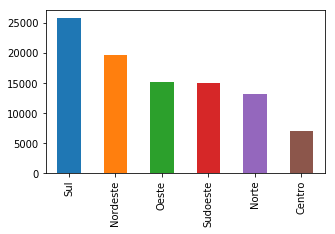

In [50]:
data_set.RPA.value_counts().plot.bar(figsize=(5,3))

In [85]:
len(data_set)

95996

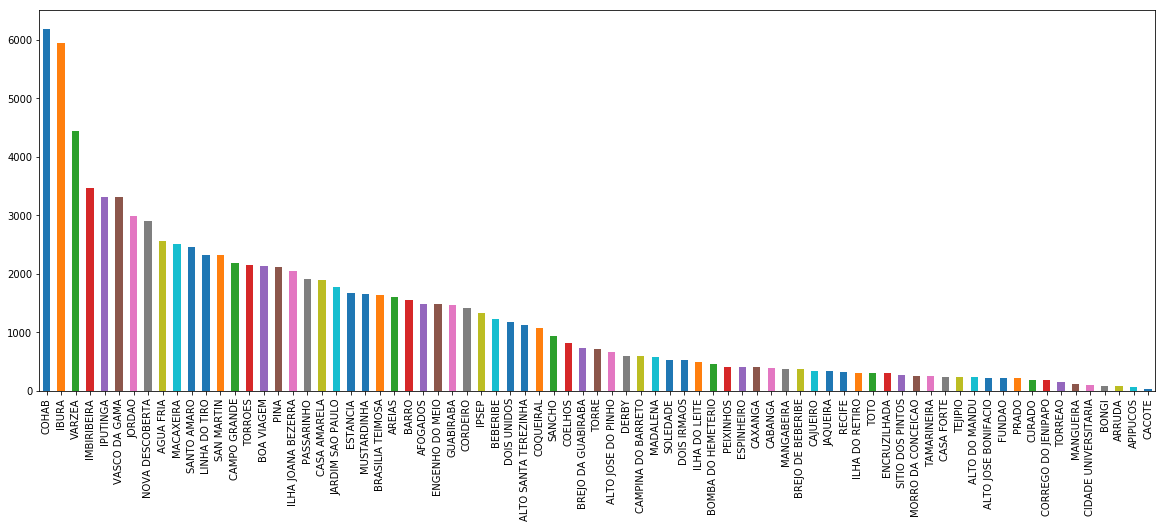

In [16]:
data_set.ebairrnome.value_counts().plot.bar(figsize=(20,7))

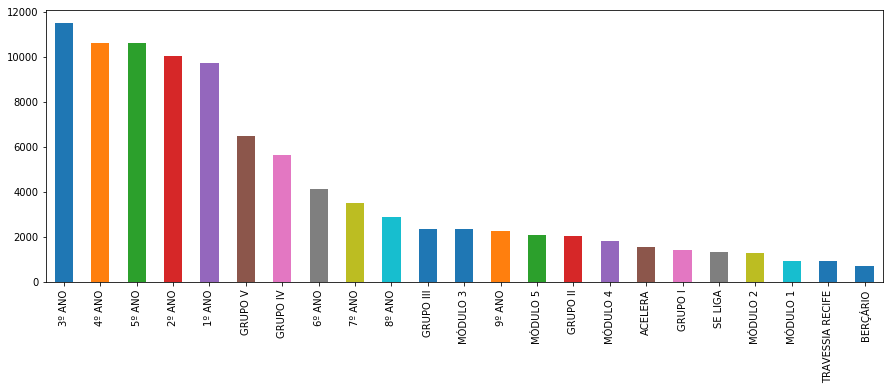

In [25]:
data_set.anoensino.value_counts().plot.bar(figsize=(15,5))

In [55]:
data_set.esermodesc.value_counts().plot.bar(figsize=(15,5))

AttributeError: 'DataFrame' object has no attribute 'esermodesc'

In [66]:
data_set.columns

Index(['nescolnome', 'ebairrnome', 'eescolruae', 'aescolnume', 'compens',
       'anoensino', 'nmodennome', 'turma', 'nturesnome', 'esitaldesc', 'RPA'],
      dtype='object')

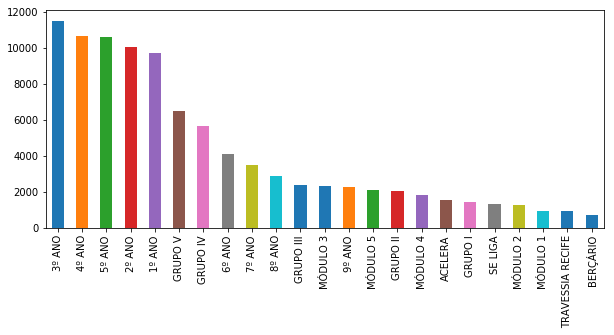

In [84]:
data_set.anoensino.value_counts().plot.bar(figsize=(10,4))

Index(['APROVADO', 'DESIST/DEIXOU FREQUE', 'FALECIDO', 'REMANEJADO',
       'RENV S/SIT FINAL DEF', 'REPROV P/  FALTA', 'RETIDO',
       'TR DUR ANO FORA REDE', 'TR DUR ANO P/REDE'],
      dtype='object', name='esitaldesc')

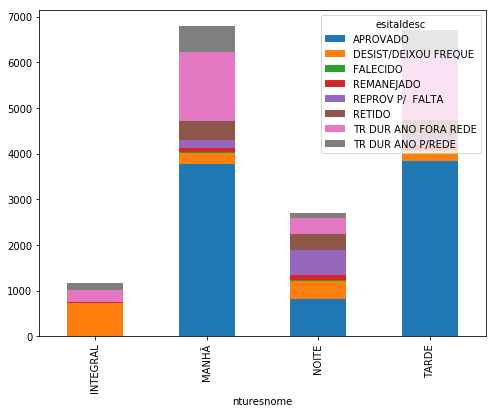

In [82]:
# data_set.nmodennome.value_counts().plot.bar(figsize=(4,3))
# data_set.nmodennome.value_counts()
# aa = data_set.groupby(['RPA', 'esitaldesc']).RPA.count()

df2 = data_set.groupby(['esitaldesc','nturesnome'])['nturesnome'].count().unstack('esitaldesc').fillna(0)
# df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['APROVADO', 'DESIST/DEIXOU FREQUE', 'FALECIDO', 'REMANEJADO', 'REPROV P/  FALTA', 'RETIDO',
       'TR DUR ANO FORA REDE', 'TR DUR ANO P/REDE']].plot(kind='bar', stacked=True, figsize=(8,6))
df2.columns



# data_set.columns
# aa.to_csv('teste.csv')
# aa.plot.bar(figsize=(15,4), stacked=True)

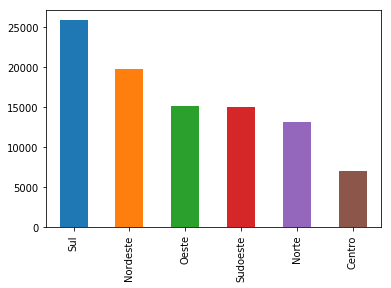

In [49]:
data_set.RPA.value_counts().plot.bar(figsize=(6,4))

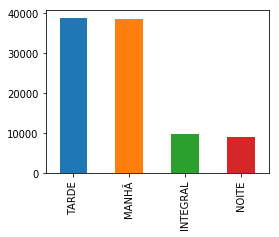

In [29]:
data_set.nturesnome.value_counts().plot.bar(figsize=(4,3))

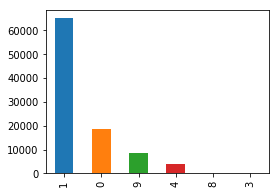

In [30]:
data_set.modens.value_counts().plot.bar(figsize=(4,3))

In [58]:
data_set.to_csv('./data_set_escola_rpa.csv', index=False)

In [2]:
data_set = pd.read_csv('./data_set_escola_rpa.csv')

In [60]:
# def oversampling_replacementoversam(train, ):
#     train = np.resize(train, labels.shape)
    
#     return train
# data_set.columns
data_set_final = data_set.drop(['cescolrpae', 'modens', 'esermodesc', 'mat'], axis=1)
# data_set_final.compens.unique()
data_set_final.to_csv('./data_set_escola_final.csv', index=False)

In [2]:
data_set = pd.read_csv('./data_set_escola_final.csv')

In [16]:
data_set.anoensino.unique()

array(['GRUPO V', '1º ANO', '2º ANO', '3º ANO', '4º ANO', '5º ANO',
       'MÓDULO 2', 'MÓDULO 1', 'MÓDULO 3', 'BERÇÁRIO', 'GRUPO I',
       'GRUPO II', 'GRUPO III', 'GRUPO IV', 'ACELERA', 'SE LIGA',
       'MÓDULO 4', 'MÓDULO 5', '6º ANO', '7º ANO', '8º ANO', '9º ANO',
       'TRAVESSIA RECIFE'], dtype=object)

In [3]:
def oversampling(data_set, label_column):
    """
    Fazer o oversampling da base de dados
    
    data_set = pd.DataFrame() como base de dados de entrada
    label_column = coluna que vai ser considerada como label no data_set
    
    retorna o data_set original com feito o oversampling por repetição 
    considerando a coluna informada como label
    """
    
#     columns = data_set.columns
    class_size = max(data_set[label_column].value_counts())
#     print (class_size)
#     data = pd.DataFrame()
#     data = data_set[data_set[label_column] == data_set[label_column].unique()[0]].values
#     data = np.resize(data, (class_size, data.shape[1]))
    
#     for class_label in data_set[label_column].unique():
#         data_class_label = data_set[data_set[label_column] == class_label].values
#         data_class_label = np.resize(data_class_label, (class_size, data_class_label.shape[1]))
        
#         data = np.append(data, data_class_label, axis=0)
        
#     np.random.shuffle(data)
    
#     data = pd.DataFrame(data)
#     data.columns = columns
    lst = []
    for class_index, group in data_set.groupby(label_column):
        lst.append(group.sample(class_size, replace=True))
        
#     print (len(lst))
    frame_new = pd.concat(lst)
    return frame_new

# oversampling(data_set, "RPA")

In [4]:
def stringToNumber(data_set, column):
    """
    converter nomes das categorias para numeros
    
    data_set = pd.DataFrame() como base de dados de entrada
    column = coluna que vai ser considerada para renomear os valores no data_set
    
    retorna o data_set original com os valores da coluna informada alterados
    """
    values = data_set[column].unique()
    numbers = [i for i, v in enumerate(values)]
    data_set[column] = data_set[column].replace(values, numbers)
    
    return data_set
    

In [5]:
def splitClass(data_set, label_column):
    """
    divide a base de dados em treinamento, teste e validação
    
    data_set = pd.DataFrame() como base de dados de entrada
    label_column = coluna que vai ser considerada como label no data_set
    """
    
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
#     data_validation = pd.DataFrame()
    
    for class_label in data_set[label_column].unique():
        data_class_label = data_set[data_set[label_column] == class_label]
        train, test = train_test_split(data_class_label, # base de dados que vai ser dividida
                                               test_size=1/5, # proporção da divisão dos dados
                                               random_state=42)
        
        data_train = data_train.append(train, ignore_index=True)
        data_test = data_test.append(test, ignore_index=True)
#         data_validation = data_validation.append(validation, ignore_index=True)
        
    return [data_train, data_test]

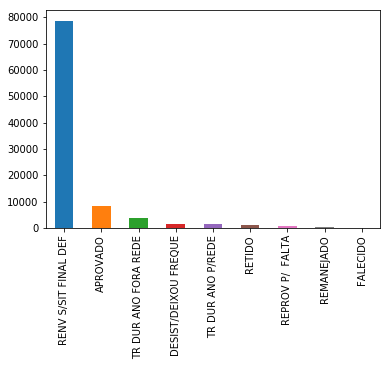

In [47]:
data_set.esitaldesc.value_counts().plot.bar()

## hipóteses

1. Dado o rpa, turma, turno e situação para dizer o modernnome
    - Arvore de decisão
        - Acuracia: 81,52%
        - MSE: 0,29
    - KNN
        - Acuracia: 76,24%
        - MSE: 0,38
    - Bayes
        - Acuracia: 66,25%
        - MSE: 2,07
2. Dado o compens, anoensino, nmodennome, turma, nturesnome e a esitaldesc dizer qual é a região politica (rpa)
    - Arvore de decisão
        - Acuracia: 32,67%
        - MSE: 7,67
    - KNN
        - Acuracia: 25,42%
        - MSE: 6,84
    - Bayes
        - Acuracia: 27,27%
        - MSE: 8,34
3. Dado nmodennome, compens, rpa e situ dizer qual é o turno
4. Dado rpa, turma e turno dizer qual é a situação
5. Dado modernnome, rpa, turno e situacao dizer anoensino


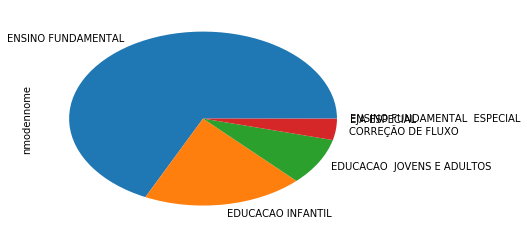

In [43]:
# oversampling(data_set, label)
# dd.nmodennome.value_counts().plot.bar()
data_set.nmodennome.value_counts().plot.pie()

In [19]:
# 1. Dado o rpa, turma, turno e situação para dizer o modernnome
print ("preparando a base de dados")
dd = data_set
# dd = stringToNumber(dd, "eescolruae")
# dd = stringToNumber(dd, "aescolnume")
# dd = stringToNumber(dd, "compens")
# dd = stringToNumber(dd, "anoensino")
dd = stringToNumber(dd, "nmodennome")
dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "esitaldesc")
dd = stringToNumber(dd, "RPA")

columns = ["turma", "nturesnome", "esitaldesc", "RPA"]
label = "nmodennome"

train, test = splitClass(dd, label)
# train = oversampling(train, label)

print ("separando trainamento e test")

X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values

np.set_printoptions(precision=2, suppress=True)

print ("Executando classificadores")

#Arvore de decisão
print ("\nArvore de decisão")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

#KNN
print ("\nKNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

# Bayes
print ("\nBayes")
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)


preparando a base de dados
separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.8152275804603687
MSE 0.29455265076554527
matrix de confusão
 [[ 33.56  65.85   0.     0.59   0.     0.  ]
 [  2.65  97.29   0.     0.06   0.     0.  ]
 [  0.     0.06  99.94   0.     0.     0.  ]
 [  0.79  78.47  15.06   5.68   0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]]

KNN
acc 0.7624205811894594
MSE 0.38397041974794294
matrix de confusão
 [[ 43.43  56.49   0.03   0.05   0.     0.  ]
 [ 13.    86.97   0.02   0.02   0.     0.  ]
 [  0.     0.06  99.94   0.     0.     0.  ]
 [ 21.14  62.88  15.06   0.92   0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]
 [  0.   100.     0.     0.     0.     0.  ]]

Bayes
acc 0.662535152588272
MSE 2.072232059160504
matrix de confusão
 [[ 28.69  55.42   0.     0.    10.24   5.65]
 [  4.16  78.76   0.     0.    14.62   2.46]
 [  0.     0.48  82.3    0.    17.22   0.  ]
 [  0.    7

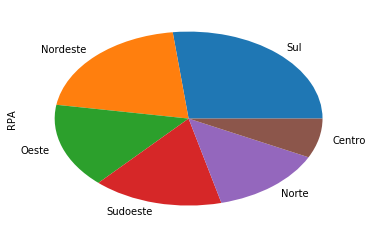

In [44]:
data_set.RPA.value_counts().plot.pie()

In [24]:
# 2. Dado o compens, anoensino, nmodennome, turma, nturesnome e a esitaldesc dizer qual é a região politica (rpa)
print ("preparando a base de dados")
dd = data_set
dd = stringToNumber(dd, "eescolruae")
dd = stringToNumber(dd, "aescolnume")
dd = stringToNumber(dd, "compens")
dd = stringToNumber(dd, "anoensino")
dd = stringToNumber(dd, "nmodennome")
dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "esitaldesc")
dd = stringToNumber(dd, "RPA")

columns = ["compens", "anoensino", "nmodennome", "turma", "nturesnome", "esitaldesc"]
label = "RPA"

train, test = splitClass(dd, label)
train = oversampling(train, label)

print ("separando trainamento e test")

X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values

np.set_printoptions(precision=2, suppress=True)

print ("Executando classificadores")

#Arvore de decisão
print ("\nArvore de decisão")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

#KNN
print ("\nKNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

# Bayes
print ("\nBayes")
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)


preparando a base de dados
separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.2710655140089574
MSE 5.905426518071034
matrix de confusão
 [[21.65 13.52 21.75  7.18 20.93 14.97]
 [10.76 26.48 17.89 12.22 20.11 12.55]
 [14.65 11.27 32.07  9.3  19.7  13.02]
 [ 9.87 16.18 16.54 38.18 11.5   7.74]
 [13.13 14.36 19.64  7.99 31.38 13.5 ]
 [14.68 10.61 20.99  8.56 20.96 24.2 ]]

KNN
acc 0.26314967190917615
MSE 6.890636392042496
matrix de confusão
 [[52.59 20.22  9.33  7.53  5.5   4.82]
 [41.6  28.49  9.9  11.39  5.48  3.14]
 [50.63 17.57 14.5   8.61  4.25  4.44]
 [34.28 19.45  9.44 32.22  2.98  1.63]
 [48.86 22.85  7.99  8.46  7.63  4.21]
 [48.41 19.34  9.42  7.59  4.91 10.33]]

Bayes
acc 0.19695865014061034
MSE 5.799187584626601
matrix de confusão
 [[12.99  4.05 41.38 13.5   9.95 18.13]
 [ 9.77  5.38 36.12 23.77  9.61 15.35]
 [13.4   4.17 43.34 14.16  9.18 15.75]
 [ 8.94  5.89 31.01 36.83  8.59  8.73]
 [ 9.39  3.85 43.52 12.64 11.51 19.1 ]
 [11.77  1.67 40.25 13.5

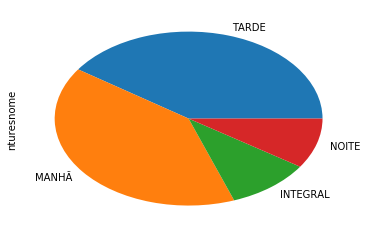

In [46]:
data_set.nturesnome.value_counts().plot.pie()

In [27]:
# 3. Dado nmodennome, compens, rpa e situ dizer qual é o turno
print ("preparando a base de dados")
dd = data_set
# dd = stringToNumber(dd, "eescolruae")
# dd = stringToNumber(dd, "aescolnume")
dd = stringToNumber(dd, "compens")
# dd = stringToNumber(dd, "anoensino")
dd = stringToNumber(dd, "nmodennome")
# dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "esitaldesc")
dd = stringToNumber(dd, "RPA")

columns = ["compens", "nmodennome", "esitaldesc", "RPA"]
label = "nturesnome"

train, test = splitClass(dd, label)
train = oversampling(train, label)

print ("separando trainamento e test")

X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values

np.set_printoptions(precision=2, suppress=True)

print ("Executando classificadores")

#Arvore de decisão
print ("\nArvore de decisão")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

#KNN
print ("\nKNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

# Bayes
print ("\nBayes")
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)


preparando a base de dados
separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.6096875
MSE 0.7316666666666667
matrix de confusão
 [[ 62.5   32.27   0.18   5.04]
 [ 47.22  44.4    0.4    7.99]
 [  0.     0.   100.     0.  ]
 [  6.94   8.02   0.    85.05]]

KNN
acc 0.56578125
MSE 0.6908854166666667
matrix de confusão
 [[41.95 55.81  0.19  2.04]
 [37.13 55.87  0.41  6.58]
 [ 0.11  0.   99.89  0.  ]
 [ 7.86 14.8   0.   77.34]]

Bayes
acc 0.5122395833333333
MSE 1.4386979166666667
matrix de confusão
 [[ 60.21  17.76   4.4   17.63]
 [ 52.    26.67   3.99  17.34]
 [  0.     0.   100.     0.  ]
 [  5.34  25.95   0.    68.71]]


In [44]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# trace0 = go.Scatter(
#     x=dd.RPA.unique(),
#     y=dd.esitaldesc.unique(),
#     mode='markers',
#     marker=dict(
#         size=list(dd.groupby(['RPA','esitaldesc']).RPA.count())
#     )
# )

# data = [trace0]
# py.iplot(data)

# plt.scatter(dd.esitaldesc.unique(), dd.esitaldesc.unique(), s=list(dd.groupby(['RPA','esitaldesc']).RPA.count()), alpha=0.5)

# data_set.esitaldesc.value_counts()
# sns.set(style="whitegrid", color_codes=True)
# sns.stripplot(x="RPA", y="esitaldesc", data=dd);
# dd.plot.scatter(x='RPA', y='esitaldesc', s=[10,50,200]);
# dfff = dd.groupby(['RPA','esitaldesc']).RPA.count()
# list(dfff.RPA.count())
# !pip install plotly
# dee = dd[dd.RPA == 0]
# dee.esitaldesc.value_counts().plot.bar()

ds = data_set.groupby(["RPA","esitaldesc","nmodennome"]).RPA.count()
# ds.to_csv('./ds.csv')
# data_set.loc[:,["RPA","esitaldesc","nmodennome"]]
ds

RPA       esitaldesc            nmodennome                
Centro    APROVADO              EDUCACAO  JOVENS E ADULTOS       45
                                ENSINO FUNDAMENTAL              501
          DESIST/DEIXOU FREQUE  CORREÇÃO DE FLUXO                 3
                                EDUCACAO  JOVENS E ADULTOS       21
                                EDUCACAO INFANTIL                49
                                ENSINO FUNDAMENTAL               72
          FALECIDO              EDUCACAO INFANTIL                 1
          REMANEJADO            CORREÇÃO DE FLUXO                 1
                                EDUCACAO INFANTIL                 2
                                ENSINO FUNDAMENTAL                7
          RENV S/SIT FINAL DEF  CORREÇÃO DE FLUXO               284
                                EDUCACAO  JOVENS E ADULTOS      184
                                EDUCACAO INFANTIL              1617
                                ENSINO FUNDAMENTAL       

In [42]:
data_set = pd.read_csv('./data_set_escola_final.csv')
# dd = data_set
# dd = stringToNumber(data_set, "esitaldesc")
# dd = stringToNumber(dd, "RPA")

In [45]:
data_set.RPA.unique()

array(['Sul', 'Oeste', 'Norte', 'Centro', 'Sudoeste', 'Nordeste'],
      dtype=object)

In [30]:
# 4. Dado rpa, turma e turno dizer qual é a situação
print ("preparando a base de dados")
dd = data_set
# dd = stringToNumber(dd, "eescolruae")
# dd = stringToNumber(dd, "aescolnume")
# dd = stringToNumber(dd, "compens")
# dd = stringToNumber(dd, "anoensino")
# dd = stringToNumber(dd, "nmodennome")
dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "esitaldesc")
dd = stringToNumber(dd, "RPA")

columns = ["turma", "nturesnome", "RPA"]
label = "esitaldesc"

train, test = splitClass(dd, label)
train = oversampling(train, label)

print ("separando trainamento e test")

X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values

np.set_printoptions(precision=2, suppress=True)

print ("Executando classificadores")

#Arvore de decisão
print ("\nArvore de decisão")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

#KNN
print ("\nKNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

# Bayes
print ("\nBayes")
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)


preparando a base de dados
separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.0764463885851169
MSE 24.296620319741706
matrix de confusão
 [[ 3.89  9.72  9.23 16.22  3.97  9.77 18.92 16.32 11.96]
 [ 3.06 12.52  8.34 16.27  4.31  6.4  19.61 16.41 13.07]
 [ 0.44  7.49 12.33 12.78 22.47  0.44 12.33 16.74 14.98]
 [ 1.9   7.71 11.03 26.08  4.92  0.71 20.51 12.69 14.46]
 [ 0.55  2.2  13.19 10.99 42.31  0.55  6.59 15.93  7.69]
 [ 0.31  7.21  4.7   4.08  9.09 37.93  9.72 15.99 10.97]
 [ 1.1  10.62  4.76 14.65  4.76  8.06 28.57 15.38 12.09]
 [ 0.    4.69 10.94  7.81 15.62  1.56 18.75 34.38  6.25]
 [ 0.    0.    0.   12.5  25.   12.5  25.   12.5  12.5 ]]

KNN
acc 0.33281258136749464
MSE 12.38337759725043
matrix de confusão
 [[38.3   7.7   6.94  4.57 18.85  8.34  3.49  9.41  2.4 ]
 [36.3   7.93  7.37  7.09 18.78  5.56  4.59  8.62  3.76]
 [25.11  3.96 14.54  3.52 29.52  6.61  1.32 11.45  3.96]
 [37.11  6.22  8.48  6.64 24.66  5.16  2.61  7.35  1.78]
 [18.68  1.65 15.93

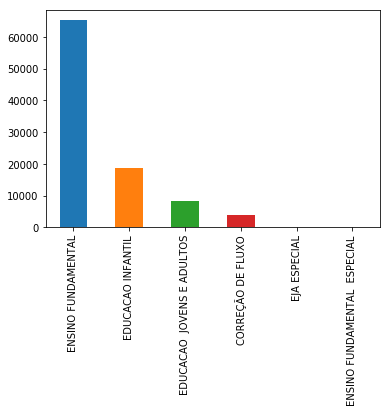

In [48]:
data_set = pd.read_csv('./data_set_escola_final.csv')
# test.esitaldesc.value_counts().plot.bar()
# data_set.anoensino.unique()

# def renameAnoEnsino(value): 
#     if value in ['GRUPO V', 'GRUPO I', 'GRUPO II', 'GRUPO III', 'GRUPO IV']:
#         return "Grupo"
#     elif value in ['1º ANO', '2º ANO', '3º ANO', '4º ANO', '5º ANO', '6º ANO', '7º ANO', '8º ANO', '9º ANO']:
#         return "Ano"
#     elif value in ['MÓDULO 2', 'MÓDULO 1', 'MÓDULO 3']:
#         return "Modulo"
#     else: 
#         return "Outro"
    
# data_set["anoensino"] = data_set.apply(lambda row: renameAnoEnsino(row.anoensino),axis=1)
# data_set.anoensino.unique()
data_set.nmodennome.value_counts().plot.bar()

In [39]:
# 5. Dado modernnome, rpa, turno e situacao dizer anoensino
print ("preparando a base de dados")
dd = data_set
# dd = stringToNumber(dd, "eescolruae")
# dd = stringToNumber(dd, "aescolnume")
# dd = stringToNumber(dd, "compens")
dd = stringToNumber(dd, "anoensino")
dd = stringToNumber(dd, "nmodennome")
# dd = stringToNumber(dd, "turma")
dd = stringToNumber(dd, "nturesnome")
dd = stringToNumber(dd, "esitaldesc")
dd = stringToNumber(dd, "RPA")

columns = ["nmodennome", "nturesnome", "esitaldesc", "RPA"]
label = "anoensino"

train, test = splitClass(dd, label)
# train = oversampling(train, label)

print ("separando trainamento e test")

X_train = train.loc[:,columns].values
X_test = test.loc[:,columns].values
y_train = train[label].values
y_test = test[label].values

np.set_printoptions(precision=2, suppress=True)

print ("Executando classificadores")

#Arvore de decisão
print ("\nArvore de decisão")
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

#KNN
print ("\nKNN")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)

# Bayes
print ("\nBayes")
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print ("acc",accuracy_score(y_test, pred))
print ("MSE",mean_squared_error(y_test, pred))
cm = confusion_matrix(y_test, pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
print ("matrix de confusão\n",cm)


preparando a base de dados
separando trainamento e test
Executando classificadores

Arvore de decisão
acc 0.958804228946409
MSE 0.1003593562835269
matrix de confusão
 [[100.     0.     0.     0.  ]
 [  0.   100.     0.     0.  ]
 [  0.     0.    72.6   27.4 ]
 [  8.47   0.    23.93  67.6 ]]

KNN
acc 0.954012811832717
MSE 0.10806728816207489
matrix de confusão
 [[99.78  0.03  0.    0.2 ]
 [ 0.01 99.99  0.    0.  ]
 [ 0.    0.11 92.93  6.96]
 [ 8.47  0.   39.86 51.67]]

Bayes
acc 0.952867038175095
MSE 0.1067652726420499
matrix de confusão
 [[100.     0.     0.     0.  ]
 [  0.    99.98   0.     0.02]
 [  0.     0.    98.67   1.33]
 [  8.47   0.    44.63  46.9 ]]


## modens e nmodennome é a mesma coisa
## cescolrpae e RPA é a mesma coisa
## a única diferença de anoensino e esermodesc é que quando o tipo é modulada, modulo 1, modulo 2 e modulo 3 alguns dados são diferentes entre si

In [63]:
# def stringNumber(data_set, column, classes, numbers):
#     data_set[column] = data_set[column].map(lambda x : numbers[classes.index(x)])
#     return data_set

# data_set = stringNumber(data_set, "RPA", list(data_set.RPA.unique()), range(0,len(data_set.RPA.unique())))
# data_set.head()

In [92]:
# oversampling_replacementoversam(data_set.values[:,:-1], data_set.values[:,-1])
# data_set.values[:,-1]
df = data_set.values[:5,-3:]

In [65]:
df = data_set.RPA.plot.
data_set.columns

Index(['nescolnome', 'ebairrnome', 'eescolruae', 'aescolnume', 'compens',
       'anoensino', 'nmodennome', 'turma', 'nturesnome', 'esitaldesc', 'RPA'],
      dtype='object')

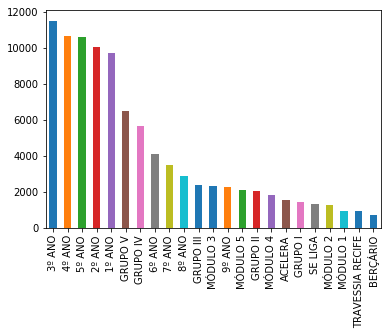

In [51]:
data_set.anoensino.value_counts().plot.bar()